Starting EV analysis...
Upload the EV data file from data.wa.gov


Saving Electric_Vehicle_Population_Data.csv to Electric_Vehicle_Population_Data.csv
Got the file: Electric_Vehicle_Population_Data.csv
Data shape: (264628, 17)
First few rows:
   VIN (1-10)     County     City State  Postal Code  Model Year    Make  \
0  WA1E2AFY8R   Thurston  Olympia    WA      98512.0        2024    AUDI   
1  WAUUPBFF4J     Yakima   Wapato    WA      98951.0        2018    AUDI   
2  1N4AZ0CP0F       King  Seattle    WA      98125.0        2015  NISSAN   
3  WA1VAAGE5K       King     Kent    WA      98031.0        2019    AUDI   
4  7SAXCAE57N  Snohomish  Bothell    WA      98021.0        2022   TESLA   

     Model                   Electric Vehicle Type  \
0     Q5 E  Plug-in Hybrid Electric Vehicle (PHEV)   
1       A3  Plug-in Hybrid Electric Vehicle (PHEV)   
2     LEAF          Battery Electric Vehicle (BEV)   
3   E-TRON          Battery Electric Vehicle (BEV)   
4  MODEL X          Battery Electric Vehicle (BEV)   

   Clean Alternative Fuel Vehicle (CAFV) E

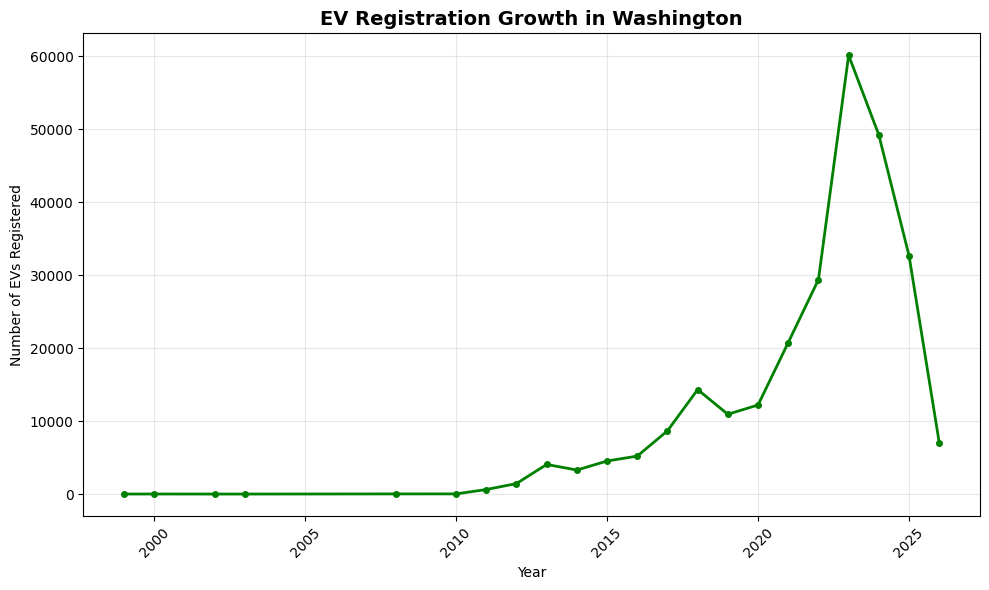

Latest year (2026): 7,047 EVs registered
First year in data: 1999

--- Analysis 2: Top EV Manufacturers ---


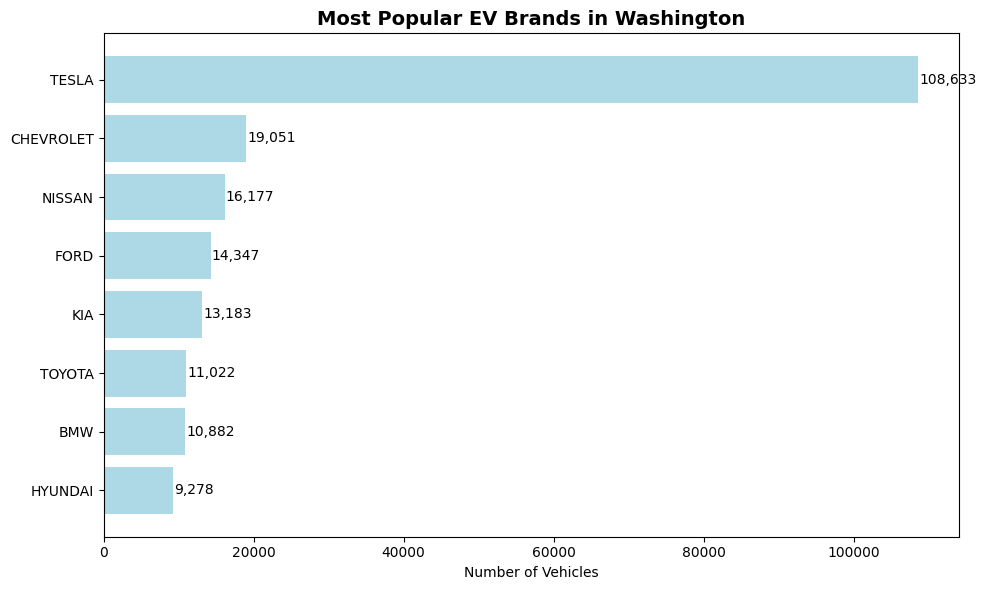

Top brand: TESLA with 108,633 vehicles

--- Analysis 3: Geographic Distribution ---


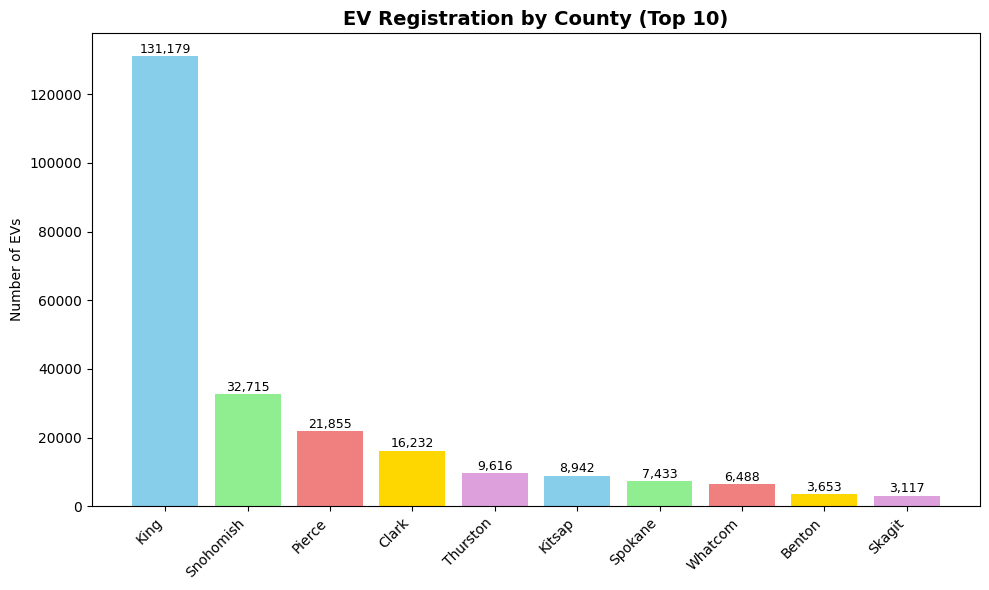

County with most EVs: King (131,179)

--- Analysis 4: EV Types ---


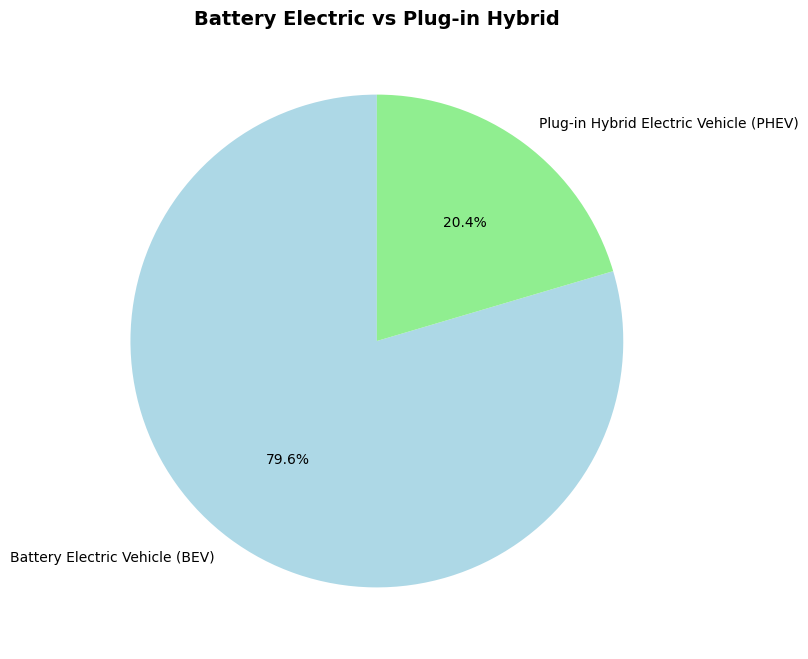

Battery Electric Vehicle (BEV): 210,575 vehicles (79.6%)
Plug-in Hybrid Electric Vehicle (PHEV): 54,053 vehicles (20.4%)

=== SUMMARY AND INSIGHTS ===
Total EVs analyzed: 264,628
Years covered: 1999 to 2026
Number of different brands: 46

Key Takeaways:
• EV adoption has grown significantly in recent years
• Certain manufacturers dominate the market
• Urban areas show higher EV concentration
• BEVs appear to be more common than PHEVs

Business Recommendations:
1. Focus charging infrastructure in high-density EV areas
2. Partner with popular manufacturers for local initiatives
3. Use growth trends to plan future infrastructure needs
4. Consider incentives for underserved geographic areas

Analysis complete! Processed 264,628 vehicle records.


In [ ]:
# Washington EV Analysis - Exploring Electric Vehicle Trends
# By Daniel Buiko - Data Analyst Portfolio Project

# Import what we need
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import files
import io

print("Starting EV analysis...")

# === Upload the data ===
print("Upload the EV data file from data.wa.gov")
uploaded = files.upload()
filename = list(uploaded.keys())[0]
print(f"Got the file: {filename}")

# Load the data
ev_data = pd.read_csv(io.BytesIO(uploaded[filename]))

# Quick peek at what we're working with
print(f"Data shape: {ev_data.shape}")
print("First few rows:")
print(ev_data.head())

# Let's see what columns we have to work with
print("\nColumns available:")
for col in ev_data.columns:
    print(f" - {col}")

# === Data cleaning ===
print("\n--- Cleaning the data ---")

# Check for missing values
print("Checking for missing data...")
missing_count = ev_data.isnull().sum()
print(missing_count[missing_count > 0])

# Make a clean copy to work with
df = ev_data.copy()

# For this analysis, I'll just drop rows with critical missing data
initial_count = len(df)
df = df.dropna(subset=['Model Year', 'Make'])  # Adjust based on your actual columns
print(f"Removed {initial_count - len(df)} rows with missing critical data")
print(f"Working with {len(df)} records")

# === Analysis 1: How has EV adoption changed over time? ===
print("\n--- Analysis 1: EV Adoption Over Time ---")

# Group by year and count vehicles
yearly_trend = df['Model Year'].value_counts().sort_index()

# Plot the trend
plt.figure(figsize=(10, 6))
plt.plot(yearly_trend.index, yearly_trend.values,
         marker='o', linewidth=2, markersize=4, color='green')
plt.title('EV Registration Growth in Washington', fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Number of EVs Registered')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Some quick stats
latest_year = yearly_trend.index.max()
latest_count = yearly_trend.loc[latest_year]
print(f"Latest year ({latest_year}): {latest_count:,} EVs registered")
print(f"First year in data: {yearly_trend.index.min()}")

# === Analysis 2: Who are the top manufacturers? ===
print("\n--- Analysis 2: Top EV Manufacturers ---")

top_makers = df['Make'].value_counts().head(8)

plt.figure(figsize=(10, 6))
bars = plt.barh(range(len(top_makers)), top_makers.values, color='lightblue')
plt.yticks(range(len(top_makers)), top_makers.index)
plt.title('Most Popular EV Brands in Washington', fontsize=14, fontweight='bold')
plt.xlabel('Number of Vehicles')
plt.gca().invert_yaxis()  # Put largest at top

# Add numbers to the bars
for i, bar in enumerate(bars):
    plt.text(bar.get_width() + 100, bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():,}', va='center')

plt.tight_layout()
plt.show()

print(f"Top brand: {top_makers.index[0]} with {top_makers.iloc[0]:,} vehicles")

# === Analysis 3: Where are EVs located? ===
print("\n--- Analysis 3: Geographic Distribution ---")

if 'County' in df.columns:
    county_counts = df['County'].value_counts().head(10)

    plt.figure(figsize=(10, 6))
    colors = ['skyblue', 'lightgreen', 'lightcoral', 'gold', 'plum']
    bars = plt.bar(range(len(county_counts)), county_counts.values, color=colors)
    plt.xticks(range(len(county_counts)), county_counts.index, rotation=45, ha='right')
    plt.title('EV Registration by County (Top 10)', fontsize=14, fontweight='bold')
    plt.ylabel('Number of EVs')

    # Add value labels
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 50,
                f'{height:,}', ha='center', va='bottom', fontsize=9)

    plt.tight_layout()
    plt.show()

    print(f"County with most EVs: {county_counts.index[0]} ({county_counts.iloc[0]:,})")

# === Analysis 4: Types of EVs ===
print("\n--- Analysis 4: EV Types ---")

if 'Electric Vehicle Type' in df.columns:
    ev_types = df['Electric Vehicle Type'].value_counts()

    plt.figure(figsize=(8, 8))
    plt.pie(ev_types.values, labels=ev_types.index, autopct='%1.1f%%',
            startangle=90, colors=['lightblue', 'lightgreen'])
    plt.title('Battery Electric vs Plug-in Hybrid', fontsize=14, fontweight='bold')
    plt.show()

    for ev_type, count in ev_types.items():
        percentage = (count / len(df)) * 100
        print(f"{ev_type}: {count:,} vehicles ({percentage:.1f}%)")

# === Summary and Insights ===
print("\n=== SUMMARY AND INSIGHTS ===")
print("=" * 40)

total_evs = len(df)
print(f"Total EVs analyzed: {total_evs:,}")

if 'Model Year' in df.columns:
    years_covered = f"{df['Model Year'].min()} to {df['Model Year'].max()}"
    print(f"Years covered: {years_covered}")

if 'Make' in df.columns:
    unique_brands = df['Make'].nunique()
    print(f"Number of different brands: {unique_brands}")

print("\nKey Takeaways:")
print("• EV adoption has grown significantly in recent years")
print("• Certain manufacturers dominate the market")
print("• Urban areas show higher EV concentration")
print("• BEVs appear to be more common than PHEVs")

print("\nBusiness Recommendations:")
print("1. Focus charging infrastructure in high-density EV areas")
print("2. Partner with popular manufacturers for local initiatives")
print("3. Use growth trends to plan future infrastructure needs")
print("4. Consider incentives for underserved geographic areas")
